In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta


from __future__ import print_function, division
from builtins import range


In [96]:
NUM_ITERS = 5001
BANDITS_PROBABILITIES = [0.3, 0.5, 0.75]

In [97]:
# This is how you can pull data from the beta distribution
beta_function = beta(1, 1)
beta_function.rvs(1)
# You can do this using th numpy as well
np.random.beta(1, 1)

0.8447821318841824

In [98]:
class Bandit:
	def __init__(self, p):
		self.win_rate = p
		self.alpha = 1
		self.beta = 1
		self.num_wins = 0
		self.num_plays = 0



	def play(self):
		stat = np.random.random() < self.win_rate
		self.num_plays += 1
		if stat:
			self.num_wins += 1
		return stat

	def sample(self):
		return np.random.beta(self.alpha, self.beta)

	def update_estimate(self, last_try):
		self.alpha += last_try
		self.beta  += 1 - last_try

	def update_p_estimate_list(self):
		self.p_estimate_list.append(self.win_estimate)


In [99]:
def plot(bandits, trial):
    x = np.linspace(0, 1, 200)
    for b in bandits:
        y = beta.pdf(x, b.alpha, b.beta)
        plt.plot(x, y, label=f"real p: {b.win_rate:.4f}, win rate = {(b.alpha - 1)}/{b.num_plays}")
    plt.title(f"Bandit distributions after {trial} trails")
    plt.legend()
    plt.show()


In [100]:
def experiment():
    bandits = [Bandit(p) for p in BANDITS_PROBABILITIES]

    sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 2000, 3000, 5000]

    rewards = np.zeros(NUM_ITERS)
    for i in range(NUM_ITERS):
        # Thompson Sampling
        j = np.argmax([b.sample() for b in bandits])
        x = bandits[j].play()
        rewards[i] = x
        bandits[j].update_estimate(x)
        if i in sample_points:
            plot(bandits, i)


    print("total reward earned:", rewards.sum())

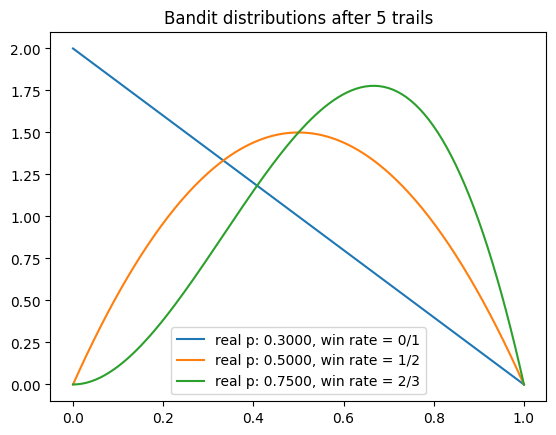

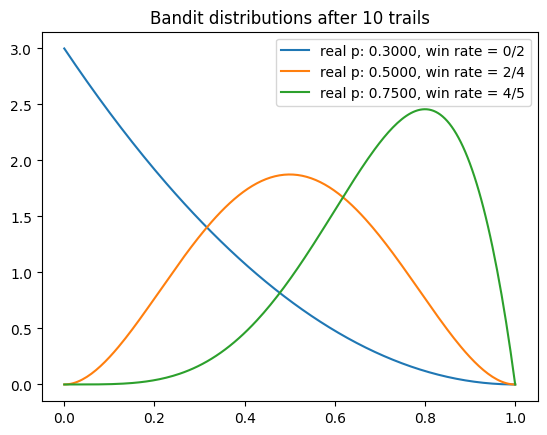

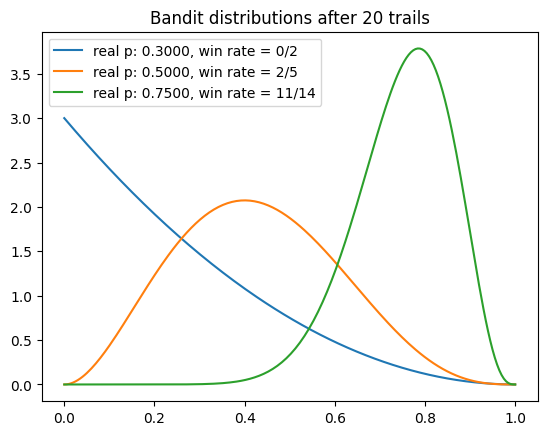

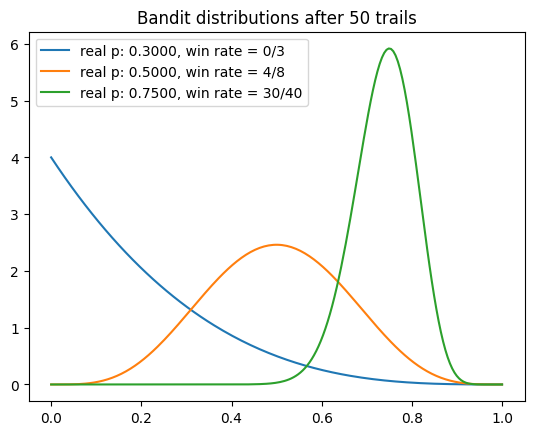

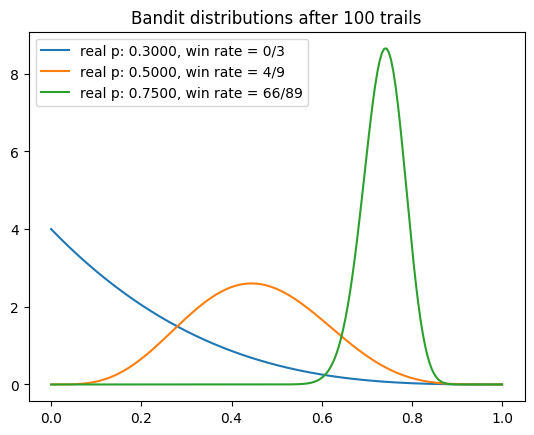

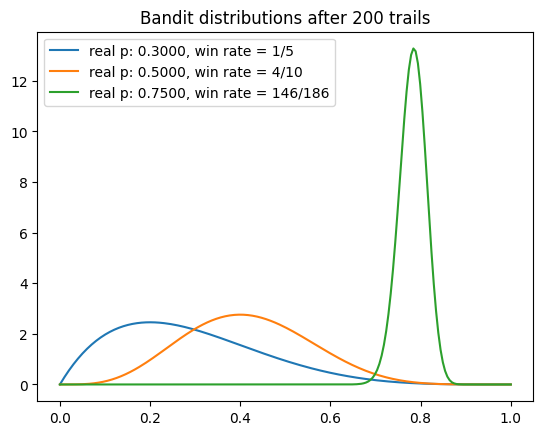

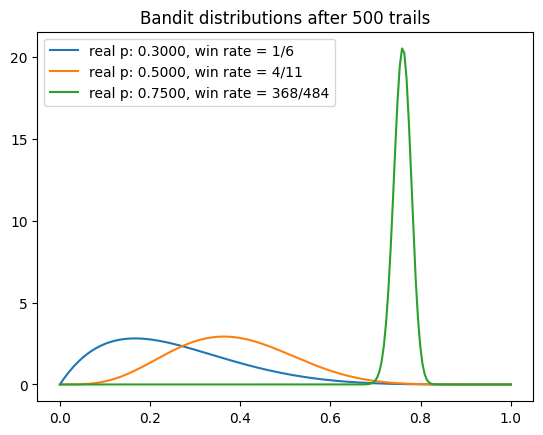

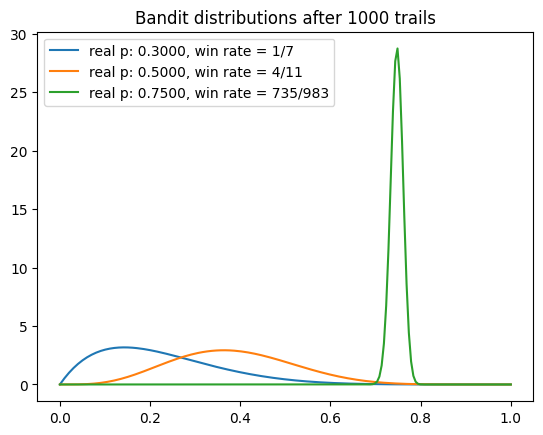

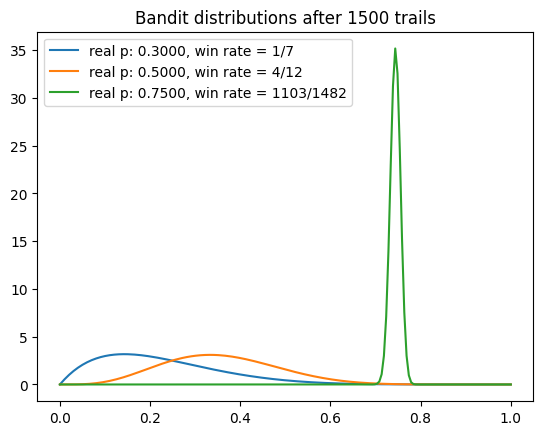

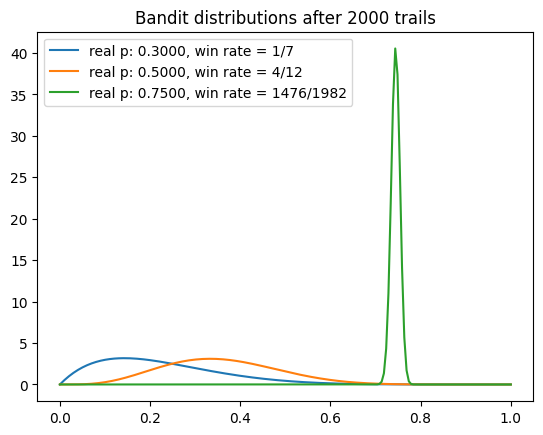

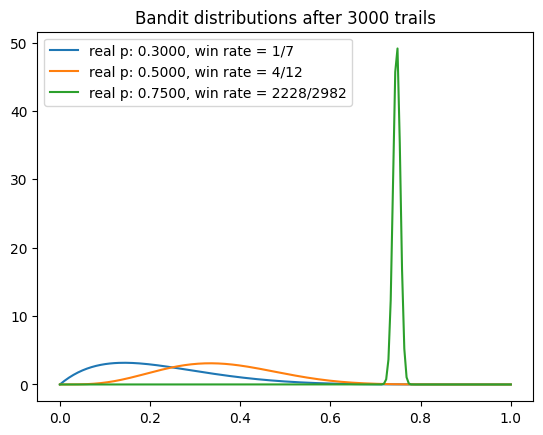

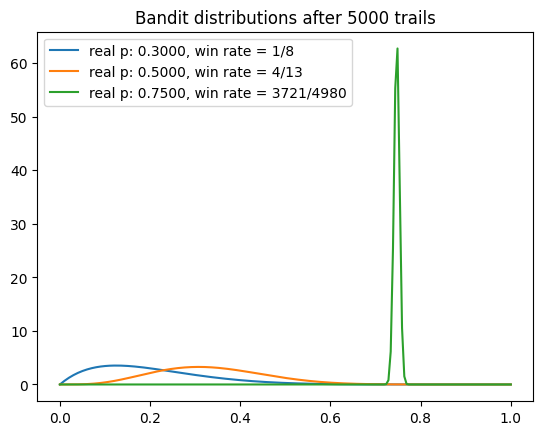

total reward earned: 3726.0


In [101]:
experiment()